### Portfolio vs index's

In [1]:
#importing modules and packages
import numpy as np
import pandas as pd
from pandas_datareader import data as wd
import matplotlib.pyplot as plt

In [2]:
#list of stock tickers
tickers = ['SHOP', 'ETSY', 'META', 'SNAP', 'SQ']
#creating dataframe
portfolio_data = pd.DataFrame()

import datetime
#using yahoo finance
import yfinance as yf

yf.pdr_override()
#statring date for time frame
start = datetime.datetime(2018, 1, 1).date()
#inserting data
for t in tickers:
    portfolio_data[t] = wd.get_data_yahoo(t, start)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
portfolio_data.info()
#cheeckign data is clean and no non missing values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1397 entries, 2018-01-02 to 2023-07-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SHOP    1397 non-null   float64
 1   ETSY    1397 non-null   float64
 2   META    1397 non-null   float64
 3   SNAP    1397 non-null   float64
 4   SQ      1397 non-null   float64
dtypes: float64(5)
memory usage: 65.5 KB


In [4]:
# list of index's ticker symbols
indexs = ['^GSPC', '^IXIC', '^GDAXI', '^FTSE']

#creating data frame
index_data = pd.DataFrame()

import datetime
#using yahoo finance
import yfinance as yf

yf.pdr_override()
#start time in regards to date time frame
start = datetime.datetime(2018, 1, 1).date()

#inserting data
for i in indexs:
    index_data[i] = wd.get_data_yahoo(i, start)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
index_data.info()
##checking data is clean and no non missing values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1397 entries, 2018-01-02 to 2023-07-21
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   1397 non-null   float64
 1   ^IXIC   1397 non-null   float64
 2   ^GDAXI  1372 non-null   float64
 3   ^FTSE   1368 non-null   float64
dtypes: float64(4)
memory usage: 54.6 KB


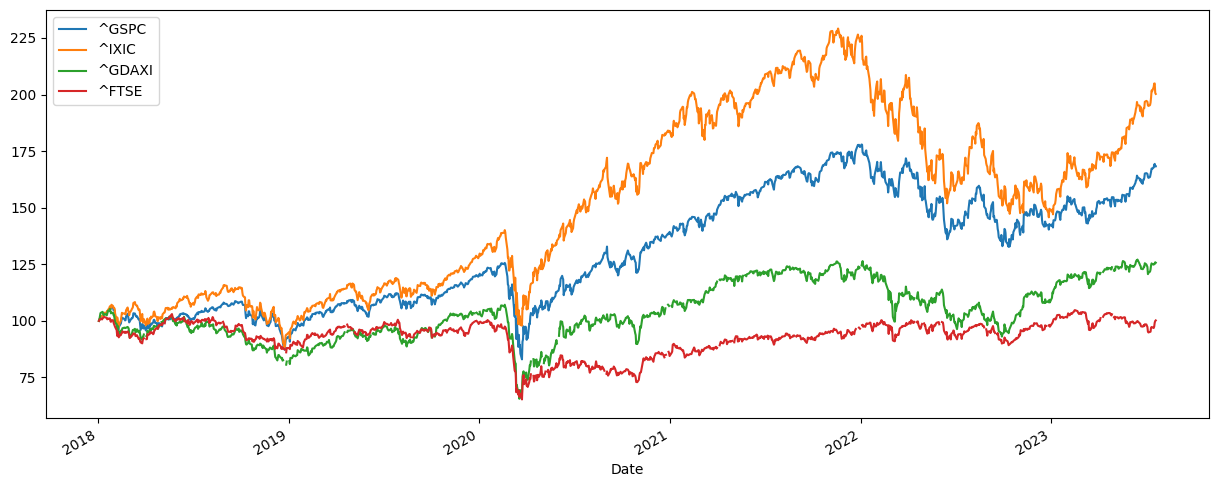

In [6]:
(index_data / index_data.iloc[0] * 100).plot(figsize=(15,6))
plt.show()
#plowing normalized index's data for fair comparison 

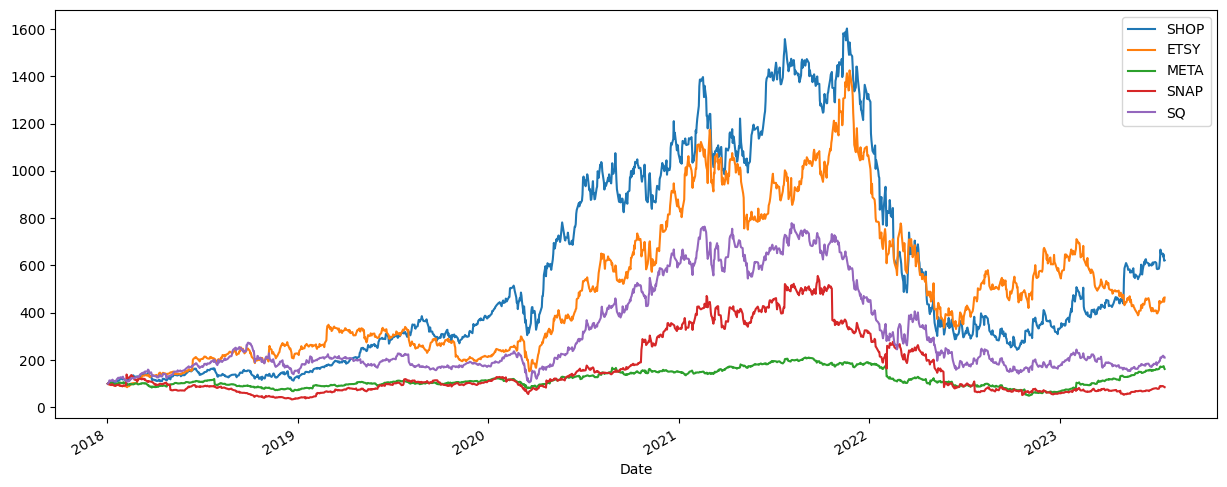

In [7]:
(portfolio_data / portfolio_data.iloc[0] * 100).plot(figsize=(15,6))
plt.show()
#plotting portfolio data normalized for fair comparison

In [8]:
#all tickers index's and portfolio
all = ['^GSPC', '^IXIC', '^GDAXI', '^FTSE','SHOP', 'ETSY', 'META', 'SNAP', 'SQ']

all_data = pd.DataFrame()

import datetime
import yfinance as yf

yf.pdr_override()

start = datetime.datetime(2018, 1, 1).date()

for a in all:
    all_data[a] = wd.get_data_yahoo(a, start)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
all_data.info()
#cheecking data is clean

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1397 entries, 2018-01-02 to 2023-07-21
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   1397 non-null   float64
 1   ^IXIC   1397 non-null   float64
 2   ^GDAXI  1372 non-null   float64
 3   ^FTSE   1368 non-null   float64
 4   SHOP    1397 non-null   float64
 5   ETSY    1397 non-null   float64
 6   META    1397 non-null   float64
 7   SNAP    1397 non-null   float64
 8   SQ      1397 non-null   float64
dtypes: float64(9)
memory usage: 109.1 KB


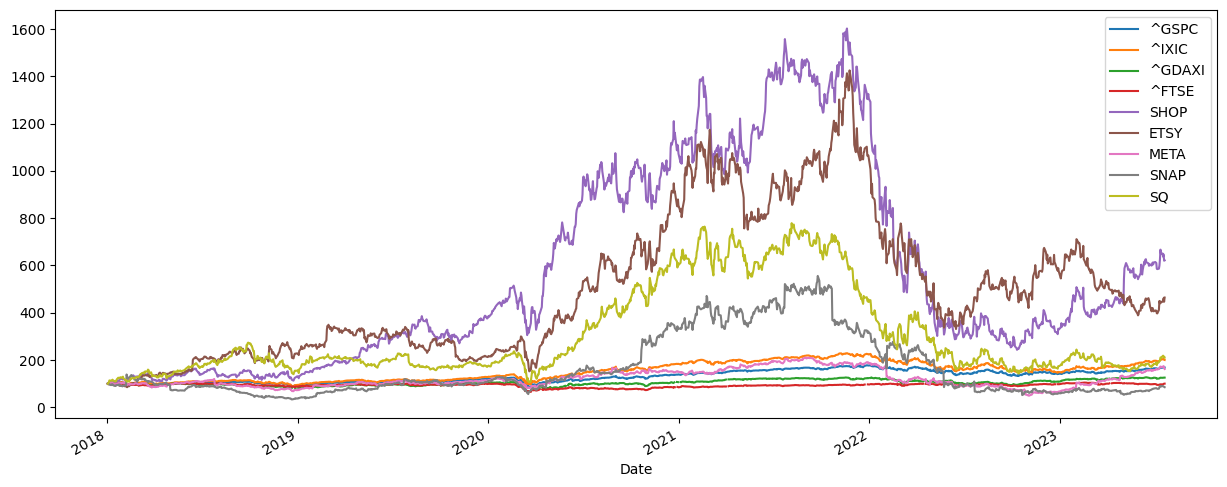

In [10]:
(all_data /all_data.iloc[0] * 100).plot(figsize=(15,6))
plt.show()
#ploting all data

In [11]:
all_returns = (all_data / all_data.shift(1)) - 1
all_returns.tail()
# computing daily returns

,^GSPC,^IXIC,^GDAXI,^FTSE,SHOP,ETSY,META,SNAP,SQ
Date,,,,,,,,,
2023-07-17,0.003855,0.009299,-0.002261,-0.003793,0.003360,0.012466,0.005666,0.024335,0.034455
2023-07-18,0.007117,0.007630,0.003537,0.006386,-0.020676,-0.000749,0.004604,-0.007424,0.012426
2023-07-19,0.002358,0.000305,-0.001027,0.018045,0.014422,0.029572,0.012690,-0.019447,-0.010629
2023-07-20,-0.006757,-0.020526,0.005915,0.007630,-0.040891,-0.031429,-0.042689,-0.013730,-0.025835
2023-07-21,0.000324,-0.002169,-0.001666,0.002302,0.001987,0.039433,-0.027304,-0.014695,-0.000656


In [12]:
all_annual_returns = all_returns.mean() * 250
all_annual_returns
#computing average annual returns based on 250 trading days

^GSPC     0.115652
^IXIC     0.155693
^GDAXI    0.054233
^FTSE     0.016620
SHOP      0.528959
ETSY      0.466876
META      0.183384
SNAP      0.271537
SQ        0.334662
dtype: float64

In [13]:
portfolio_returns = (portfolio_data / portfolio_data.shift(1)) - 1
portfolio_returns.head()
#computing portfolio daily returns

,SHOP,ETSY,META,SNAP,SQ
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.021424,-0.020163,0.017914,0.024080,0.031518
2018-01-04,0.020418,-0.008819,-0.001841,-0.047028,0.021174
2018-01-05,0.005730,0.000989,0.013671,-0.006169,0.079790
2018-01-08,0.016007,0.003457,0.007653,-0.030345,-0.009237


In [14]:
portfolio_weights = np.array([0.2, 0.2, 0.2, 0.2 ,0.2])
portfolio_r = np.dot(portfolio_returns, portfolio_weights)
portfolio_r
#assgining weights to portfolio (evenly distributed investing equally in each stock)

array([        nan,  0.01495461, -0.00321938, ...,  0.00532181,
       -0.0309146 , -0.00024713])

In [15]:
portfolio_annual_returns = portfolio_returns.mean() * 250
portfolio_annual_returns
#computing anuual portfolio returns

SHOP    0.528959
ETSY    0.466876
META    0.183384
SNAP    0.271537
SQ      0.334662
dtype: float64

In [16]:
index_returns = (index_data / index_data.shift(1)) - 1
index_returns.head()
#computing daily gains index's

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,0.006399,0.008367,0.008299,0.003007
2018-01-04,0.004029,0.001752,0.014615,0.003233
2018-01-05,0.007034,0.008286,0.011524,0.003677
2018-01-08,0.001662,0.002919,0.003614,-0.003586


In [17]:
index_weights = np.array([0.25, 0.25, 0.25, 0.25])
index_r = np.dot(index_returns, index_weights)
index_r
#assigning weigts for index's

array([        nan,  0.00651815,  0.00590725, ...,  0.0049202 ,
       -0.00343427, -0.00030227])

In [18]:
index_annual_returns = index_returns.mean() * 250
index_annual_returns
#avrage annual returns index's based on 250 trading days per year

^GSPC     0.115652
^IXIC     0.155693
^GDAXI    0.054233
^FTSE     0.016620
dtype: float64

In [19]:
portfolio_annual_return = str(round(np.dot(portfolio_annual_returns, portfolio_weights), 5)*100) + ' %'
print(portfolio_annual_return)
#portfolio annual returns

35.708 %


In [20]:
index_annual_return = str(round(np.dot(index_annual_returns, index_weights), 5)*100) + ' %'
print(index_annual_return)
#index's annual returns

8.555 %


# Conclusion
## based on the current research of this Mini project:

#### the anuual rate of return of a evenily distributed portfolio containing the stocks: [Shopify, Esty, Meta, Snapchat, Sqaure] from the date 2018/01/01 would produce a avrage annual rate of return of 35.70%

#### the anuual rate of return of a evenily distributed portfolio containing the Index's: [S&P 500, NASDAQ, DAX, FTSE 100] from the date 2018/01/01 would produce a avrage annual rate of return of 8.55%


# Wall Street Bets vs S&P 500

In [21]:
#importing and making data frames
wsb_tickers = ['GME', 'AMC', 'BB']
snp_500 = ['^GSPC']
all_tickers = ['GME', 'AMC', 'BB', '^GSPC']

wsb_data = pd.DataFrame()
snp_data = pd.DataFrame()
all_d = pd.DataFrame()

import datetime
#using yahoo finance
import yfinance as yf

yf.pdr_override()
#start date in regards to time frame
start = datetime.datetime(2020, 1, 1).date()

for w in wsb_tickers:
    wsb_data[w] = wd.get_data_yahoo(w, start)['Adj Close']

for i in snp_500:
    snp_data[i] = wd.get_data_yahoo(i, start)['Adj Close']

for a in all_tickers:
    all_d[a] = wd.get_data_yahoo(a, start)['Adj Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
wsb_data.info()
#checking data is clean

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 894 entries, 2020-01-02 to 2023-07-21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GME     894 non-null    float64
 1   AMC     894 non-null    float64
 2   BB      894 non-null    float64
dtypes: float64(3)
memory usage: 27.9 KB


In [23]:
snp_data.info()
#checking data is clean

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 894 entries, 2020-01-02 to 2023-07-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   894 non-null    float64
dtypes: float64(1)
memory usage: 14.0 KB


In [24]:
all_d.info()
#checking data is clean

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 894 entries, 2020-01-02 to 2023-07-21
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GME     894 non-null    float64
 1   AMC     894 non-null    float64
 2   BB      894 non-null    float64
 3   ^GSPC   894 non-null    float64
dtypes: float64(4)
memory usage: 34.9 KB


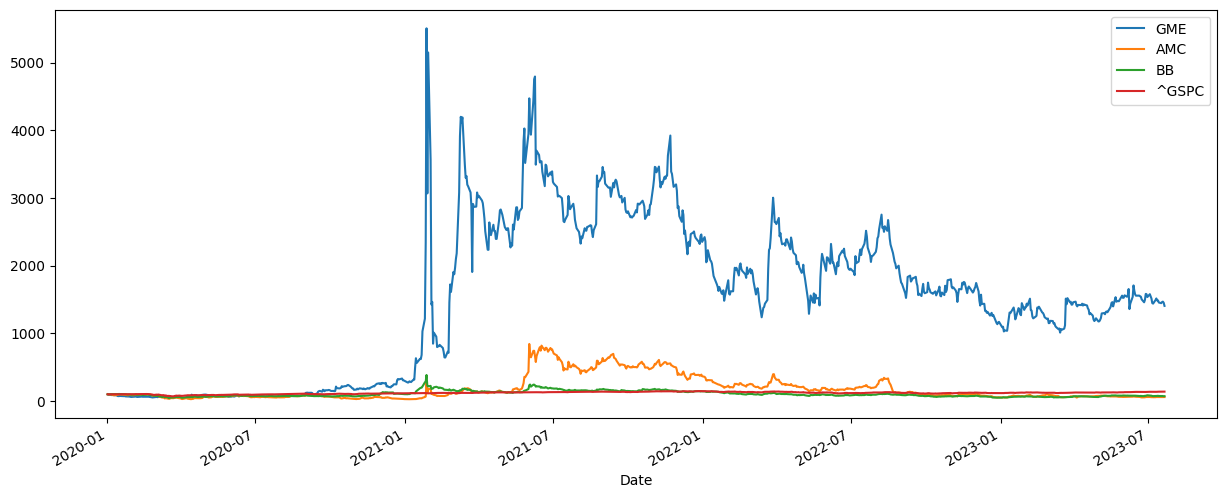

In [25]:
(all_d /all_d.iloc[0] * 100).plot(figsize=(15,6))
plt.show()
#ploting normalized data to show a fair comparision

In [26]:
wsb_returns = (wsb_data / wsb_data.shift(1)) - 1
wsb_returns.head()

,GME,AMC,BB
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.068146,-0.018767,-0.009202
2020-01-06,-0.005102,-0.027322,0.034056
2020-01-07,-0.056410,0.001405,-0.002994
2020-01-08,0.036232,-0.071529,0.000000


In [27]:
snp_returns = (snp_data / snp_data.shift(1)) - 1
snp_returns.head()

,^GSPC
Date,
2020-01-02,NaN
2020-01-03,-0.007060
2020-01-06,0.003533
2020-01-07,-0.002803
2020-01-08,0.004902


In [28]:
#assiging evenly distributed weights to portfolio and s&p 500
wsb_weights = np.array([1/3, 1/3, 1/3])
snp_weights = np.array([1.0])

wsb_r = np.dot(wsb_returns, wsb_weights)
snp_r = np.dot(snp_returns, snp_weights)

In [29]:
snp_annual_returns = snp_returns.mean() *250
snp_annual_returns
#s&p50 avergae annual returns

^GSPC    0.121517
dtype: float64

In [30]:
wsb_annual_returns = wsb_returns.mean() * 250
wsb_annual_returns
#wall street bets avergae annual returns

GME    1.922737
AMC    1.285728
BB     0.189852
dtype: float64

In [35]:
wsb_annual_return = 'WSB annual returns : ' + str(round(np.dot(wsb_annual_returns, wsb_weights), 5)*100) + ' %'
print(wsb_annual_return)
#WSB annual returns

WSB annual returns : 113.277 %


In [36]:
snp_annual_return = 'S&P 500 annual returns : ' + str(round(np.dot(snp_annual_returns, snp_weights), 5)*100) + ' %'
print(snp_annual_return)
#S&P500 annual returns

S&P 500 annual returns : 12.152000000000001 %


In [37]:
#downloading datasets
GME = yf.download('GME', start=start)['Adj Close']
AMC = yf.download('AMC', start=start)['Adj Close']
BB = yf.download('BB', start=start)['Adj Close']
SP500 = yf.download('^GSPC', start=start)['Adj Close']

# Create a DataFrame with all tickers and their adjusted close prices
all_tickers_data = pd.concat([GME, AMC, BB, SP500], axis=1)
all_tickers_data.columns = ['GME', 'AMC', 'BB', 'S&P 500']

# Calculate the portfolio by taking the average of the three stocks
wsb_portfolio_even_distribute = (all_tickers_data['GME'] + all_tickers_data['AMC'] + all_tickers_data['BB']) / 3

# Calculate the percentage gain or loss for the portfolio
portfolio_percent_gain = 100 * ((wsb_portfolio_even_distribute.iloc[-1] - wsb_portfolio_even_distribute.iloc[0]) / wsb_portfolio_even_distribute.iloc[0])

# Calculate the percentage gain or loss for the S&P 500
SP500_percent_gain = 100 * ((all_tickers_data['S&P 500'].iloc[-1] - all_tickers_data['S&P 500'].iloc[0]) / all_tickers_data['S&P 500'].iloc[0])

# Print the results
print('Portfolio percentage gain:', portfolio_percent_gain, '%')
print('S&P 500 percentage gain:', SP500_percent_gain, '%')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Portfolio percentage gain: 101.65017896864666 %
S&P 500 percentage gain: 39.24335705358317 %


# Conclusion:

#### The average annual rate fo return of the wall street bets portfolio from the date 2020/01/01 stands at: 113.277 %
#### The average annual rate fo return of the S&P 500 from the date 2020/01/01 stands at: 12.152 %

#### How ever as this was a volitile trade using the mean dose not give a significat insite weather this trade payed off in the long term in regards to the time frame (2020/01/01 - 2023/07/23)

### by further research we can aknowlage that in the time frame (2020/01/01 - 2023/07/23):
#### Portfolio percentage gain: 101.65017896864666 %
#### S&P 500 percentage gain: 39.24335705358317 %

### Summery: if one was to invest on the date 2020/01/01 X amount in to a uniformily distributed portfolio containing the stocks Game stop, AMC and black berry (investing X/3 in eahc stock) this portfolio's performance would currently stand at 101.65%. However investing the same amount in the S&P 500 would have given a gain of 39.24%. hence we conclude that those would held with "diamond hands" are still better off and have out performed the S&P 500.
